# Cargar datos y librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statistics import mode
import os
import glob
import random
import cv2

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

import cv2
# Features 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage import feature
# Metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #c alculate accuracy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
# Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#Save model
import joblib  

In [ ]:
from numpy.core.fromnumeric import reshape
path = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/ROF1/Train"

list_people = os.listdir(path)

type_file = "*.jpg"

cont = 0
cont2 = 0

for k in list_people:
    
    path_image = path + "/" + k
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    cont += len(list_jpg)
    
print("El número de muestras: ",cont)

train_data = np.zeros((cont,192,168))
train_data = train_data.astype('float32')

y_train = np.zeros(cont)
y_train = y_train.astype('int8')


for i in list_people:
    
    #print(i)
    
    path_image = path + "/" + i
    
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    for j in list_jpg:
        
        image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (168,192))
        train_data[cont2] += image 

        cadena = j
        posicion = i[-1]

        y_train[cont2] = posicion
        #print(y_train[cont2])
        cont2 += 1

#print(y_train)

El número de muestras:  998


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/ROF1/Test/mask"

list_people = os.listdir(path)

subcadena = "yaleB" #la subcadena que queremos localizar
type_file = "*.jpg"

cont = 0
cont2 = 0

for k in list_people:
    
    path_image = path + "/" + k
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    cont += len(list_jpg)
    
print("El número de muestras: ",cont)

test_data = np.zeros((cont,192,168))
test_data = test_data.astype('float32')

y_test = np.zeros(cont)
y_test = y_test.astype('int8')


for i in list_people:
    
    #print(i)
    
    path_image = path + "/" + i
    
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    for j in list_jpg:
        
        image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (168,192))
        
        test_data[cont2] += image 

        cadena = j
        posicion = i[-1]

        y_test[cont2] = posicion
        #print(y_train[cont2])
        cont2 += 1

#print(y_train)

El número de muestras:  200


In [ ]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int8)

# Separar datos en train y test

In [ ]:
nsamples, nx, ny = train_data.shape

train_data = train_data.reshape((nsamples,nx*ny))

X_sparse = coo_matrix(train_data)

train_data, X_sparse, y_train = shuffle(train_data, X_sparse,y_train, random_state=0)

train_data = train_data.reshape((nsamples,nx,ny))

In [ ]:
nsamples, nx, ny = test_data.shape

test_data = test_data.reshape((nsamples,nx*ny))

X_sparse = coo_matrix(test_data)

test_data, X_sparse, y_test = shuffle(test_data, X_sparse,y_test, random_state=0)

test_data = test_data.reshape((nsamples,nx,ny))

In [ ]:
train_data = train_data.astype("uint8")
nsamples1, nx1, ny1 = train_data.shape
train_data = train_data.reshape((nsamples1,nx1*ny1))
train_data = train_data/255

test_data = test_data.astype("uint8")
nsamples, nx, ny = test_data.shape
test_data = test_data.reshape((nsamples,nx*ny))
test_data = test_data/255

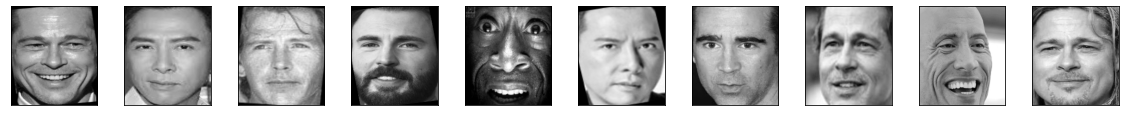

In [ ]:
# Para imprimir algunas de las imagenes de entrenamiento

view = train_data
view = view.reshape((nsamples1,nx1,ny1))
n = 10  # cantidad de imagenes

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(view[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#cv2.imwrite('Imagen_gris.png',view[0])
plt.show()

# LBP


## Extracción de caracteristicas

In [ ]:
# https://github.com/AsoStrife/Computer-Vision-Project

def blockshaped(arr, nrows, ncols):

    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
            .swapaxes(1,2)
            .reshape(-1, nrows, ncols))
def getHistogram(imgArray):
    hist, bin_edges = np.histogram(imgArray, density=True)
    return hist

In [ ]:
# tamaño de train y test
cont_train = train_data.shape[0]
cont_test = test_data.shape[0]
print(cont_test)

200


In [ ]:
train_data_LBP = train_data.reshape((cont_train,nx,ny))
lbp_feactures  = np.zeros((cont_train,nx,ny))

eps = 1e-7
radius = 1
n_points = 8 * radius

lbp_hist = np.zeros((cont_train,1440))

for i in range(0,cont_train): 
    lbp = feature.local_binary_pattern(train_data_LBP[i], n_points, radius)
    lbp_feactures[i] +=  lbp
    
    shaped = blockshaped(lbp_feactures[i], 16, 14)
    x = []
    xBlocks = []
    for s in shaped:
        xBlocks.append(getHistogram(s))
    # Concatenate the various histogram, the resulting histogram is append into feature vector
    x.append(np.concatenate(xBlocks))
    
    lbp_hist[i] += x[0]

In [ ]:
test_data_LBP = test_data.reshape((cont_test,nx,ny))
lbp_feactures_test  = np.zeros((cont_test,nx,ny))


lbp_hist_test = np.zeros((cont_test,1440))

for i in range(0,cont_test): 
    lbp = feature.local_binary_pattern(test_data_LBP[i], n_points, radius)
    lbp_feactures_test[i] +=  lbp
    
    shaped = blockshaped(lbp_feactures_test[i], 16, 14)
    x = []
    xBlocks = []
    for s in shaped:
        xBlocks.append(getHistogram(s))
    # Concatenate the various histogram, the resulting histogram is append into feature vector
    x.append(np.concatenate(xBlocks))
    
    lbp_hist_test[i] += x[0]
    

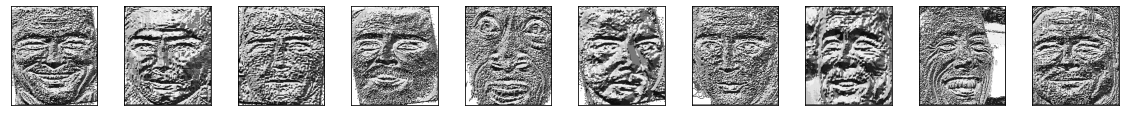

In [ ]:
view = lbp_feactures
n = 10  # cantidad de imagenes

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(view[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## SMV

In [ ]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_lbp_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_lbp_svm = clf_lbp_svm.fit(lbp_hist,y_train )

print("El mejor conjunto de caracteriticas es: ")
print(clf_lbp_svm.best_estimator_)

El mejor conjunto de caracteriticas es: 
SVC(C=100000.0, class_weight='balanced', gamma=0.001)


In [ ]:
y_pred_lbp_svm = clf_lbp_svm.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_svm,digits=4,output_dict=True)
print(classification_report(y_test, y_pred_lbp_svm,digits=4))

              precision    recall  f1-score   support

           0     0.5789    0.5500    0.5641        20
           1     0.8000    0.4000    0.5333        20
           2     0.6667    0.6000    0.6316        20
           3     0.4667    0.3500    0.4000        20
           4     0.6087    0.7000    0.6512        20
           5     0.7857    0.5500    0.6471        20
           6     0.7143    0.7500    0.7317        20
           7     0.3103    0.9000    0.4615        20
           8     0.6875    0.5500    0.6111        20
           9     1.0000    0.3000    0.4615        20

    accuracy                         0.5650       200
   macro avg     0.6619    0.5650    0.5693       200
weighted avg     0.6619    0.5650    0.5693       200



In [ ]:
import pandas
df = pandas.DataFrame(report).transpose()
df.to_excel("svmLBP.xlsx")  

In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred_lbp_svm))

0.5303369841785858


In [ ]:
def specificity(y_true,y_pred):
        cm=confusion_matrix(y_true, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)
        
print(specificity(y_test, y_pred_lbp_svm))

0.9516666666666665


## KNN

In [ ]:
clf_lbp_Kn_3 = KNeighborsClassifier(n_neighbors=7)

In [ ]:
clf_lbp_Kn_3 = clf_lbp_Kn_3.fit(lbp_hist,y_train)

In [ ]:
y_pred_lbp_knn = clf_lbp_Kn_3.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_knn,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()                   
df.to_excel("knnLBP.xlsx")   
print(classification_report(y_test, y_pred_lbp_knn,digits=4))

              precision    recall  f1-score   support

           0     0.4783    0.5500    0.5116        20
           1     0.3704    0.5000    0.4255        20
           2     0.5833    0.3500    0.4375        20
           3     0.3929    0.5500    0.4583        20
           4     0.9000    0.4500    0.6000        20
           5     0.5909    0.6500    0.6190        20
           6     0.3636    0.4000    0.3810        20
           7     0.6296    0.8500    0.7234        20
           8     0.2632    0.2500    0.2564        20
           9     0.7000    0.3500    0.4667        20

    accuracy                         0.4900       200
   macro avg     0.5272    0.4900    0.4879       200
weighted avg     0.5272    0.4900    0.4879       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred_lbp_knn))

0.43603053043016


In [ ]:
print(specificity(y_test, y_pred_lbp_knn))                 

0.9433333333333331


## Gauss

In [ ]:
clf_lbp_Gauss = GaussianNB()

In [ ]:
clf_lbp_Gauss = clf_lbp_Gauss.fit(lbp_hist,y_train)

In [ ]:
y_pred_lbp_gaus = clf_lbp_Gauss.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_gaus,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussLBP.xlsx")
print(classification_report(y_test, y_pred_lbp_gaus,digits=4))

              precision    recall  f1-score   support

           0     0.7143    0.5000    0.5882        20
           1     0.4167    0.5000    0.4545        20
           2     0.4667    0.3500    0.4000        20
           3     0.1778    0.4000    0.2462        20
           4     0.4545    0.5000    0.4762        20
           5     0.4000    0.1000    0.1600        20
           6     0.7143    0.2500    0.3704        20
           7     0.5000    0.7500    0.6000        20
           8     0.2308    0.3000    0.2609        20
           9     0.5000    0.3000    0.3750        20

    accuracy                         0.3950       200
   macro avg     0.4575    0.3950    0.3931       200
weighted avg     0.4575    0.3950    0.3931       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred_lbp_gaus))

0.33386125342031325


In [ ]:
print(specificity(y_test, y_pred_lbp_gaus)) 

0.9327777777777777


# PCA 

## Extracción de caracteristicas 

In [ ]:
n_components = 150

print("Extrayendo %d eigenfaces de %d caras"
      % (n_components, train_data.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(train_data)


eigenfaces = pca.components_.reshape((n_components, nx1, ny1))

print("Projecting the input data on the eigenfaces orthonormal basis")

train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

Extrayendo 150 eigenfaces de 998 caras
Projecting the input data on the eigenfaces orthonormal basis


## SVM


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf_pca_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_pca_svm = clf_pca_svm.fit(train_data_pca,y_train )

print("Best estimator found by grid search:")
print(clf_pca_svm.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [ ]:
y_pred = clf_pca_svm.predict(test_data_pca)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("svmPCA.xlsx")  


              precision    recall  f1-score   support

           0     0.9167    0.5500    0.6875        20
           1     0.8095    0.8500    0.8293        20
           2     0.5333    0.8000    0.6400        20
           3     0.4000    0.4000    0.4000        20
           4     0.7895    0.7500    0.7692        20
           5     0.7647    0.6500    0.7027        20
           6     0.7500    0.7500    0.7500        20
           7     0.9286    0.6500    0.7647        20
           8     0.5625    0.9000    0.6923        20
           9     0.6000    0.4500    0.5143        20

    accuracy                         0.6750       200
   macro avg     0.7055    0.6750    0.6750       200
weighted avg     0.7055    0.6750    0.6750       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.642287733785637


In [ ]:
print(specificity(y_test, y_pred)) 

0.9638888888888889


## knn

In [ ]:
clf_PCA_Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_lbp_Kn_3 = clf_PCA_Knn_3.fit(train_data_pca,y_train)

In [ ]:
y_pred = clf_lbp_Kn_3.predict(test_data_pca)

report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("knnPCA.xlsx")
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.6190    0.6500    0.6341        20
           1     0.3182    0.7000    0.4375        20
           2     0.4444    0.8000    0.5714        20
           3     0.5455    0.6000    0.5714        20
           4     0.8750    0.3500    0.5000        20
           5     0.6667    0.6000    0.6316        20
           6     1.0000    0.2000    0.3333        20
           7     0.6000    0.3000    0.4000        20
           8     0.6522    0.7500    0.6977        20
           9     0.6429    0.4500    0.5294        20

    accuracy                         0.5400       200
   macro avg     0.6364    0.5400    0.5307       200
weighted avg     0.6364    0.5400    0.5307       200

[[13  0  2  0  0  1  0  1  2  1]
 [ 3 14  1  0  0  0  0  0  1  1]
 [ 1  0 16  0  0  1  0  0  0  2]
 [ 0  6  1 12  0  0  0  0  1  0]
 [ 1  6  2  4  7  0  0  0  0  0]
 [ 0  2  5  0  0 12  0  0  1  0]
 [ 0  4  4  3  1  1  4  0  3  0]
 [ 2  4  1

In [ ]:
print(matthews_corrcoef(y_test, y_pred)) 

0.498580768599718


In [ ]:
print(specificity(y_test, y_pred)) 

0.9488888888888889


## Gauss

In [ ]:
clf_PCA_Gauss = GaussianNB()

In [ ]:
clf_lbp_Gauss = clf_PCA_Gauss.fit(train_data_pca,y_train)

In [ ]:
y_pred = clf_lbp_Gauss.predict(test_data_pca)

report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussPCA.xlsx")  
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.4545    0.5000    0.4762        20
           1     0.6667    0.3000    0.4138        20
           2     0.6364    0.3500    0.4516        20
           3     0.2821    0.5500    0.3729        20
           4     0.2500    0.0500    0.0833        20
           5     0.3750    0.6000    0.4615        20
           6     0.5556    0.5000    0.5263        20
           7     1.0000    0.1500    0.2609        20
           8     0.4054    0.7500    0.5263        20
           9     0.0800    0.1000    0.0889        20

    accuracy                         0.3850       200
   macro avg     0.4706    0.3850    0.3662       200
weighted avg     0.4706    0.3850    0.3662       200

[[10  0  2  2  1  1  1  0  1  2]
 [ 3  6  0  8  0  1  0  0  1  1]
 [ 0  0  7  0  1  3  1  0  3  5]
 [ 1  0  0 11  0  1  1  0  2  4]
 [ 3  1  0  6  1  1  2  0  3  3]
 [ 2  0  0  2  0 12  1  0  0  3]
 [ 1  2  0  0  1  1 10  0  3  2]
 [ 0  0  2

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.3238249586519396


In [ ]:
print(specificity(y_test, y_pred)) 

0.9316666666666666


# LDA

## Extracción de caracteristicas 

In [ ]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(train_data, y_train)
train_data_LDA = lda.transform(train_data)
test_data_LDA = lda.transform(test_data)

## SVM

In [ ]:
clf_lda_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_lda_svm = clf_lda_svm.fit(train_data_LDA,y_train )

print("Best estimator found by grid search:")
print(clf_lda_svm.best_estimator_)

Best estimator found by grid search:
SVC(C=10000.0, class_weight='balanced', gamma=0.0001)


In [ ]:
y_pred_lda_svm = clf_lda_svm.predict(test_data_LDA)
report = classification_report(y_test, y_pred_lda_svm,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("svmLDA.xlsx")  
print(classification_report(y_test, y_pred_lda_svm,digits=4))

              precision    recall  f1-score   support

           0     0.1429    0.1000    0.1176        20
           1     0.0000    0.0000    0.0000        20
           2     0.4375    0.3500    0.3889        20
           3     0.2000    0.1000    0.1333        20
           4     0.4667    0.3500    0.4000        20
           5     0.2500    0.3000    0.2727        20
           6     0.3125    0.2500    0.2778        20
           7     0.8235    0.7000    0.7568        20
           8     0.2093    0.4500    0.2857        20
           9     0.3784    0.7000    0.4912        20

    accuracy                         0.3300       200
   macro avg     0.3221    0.3300    0.3124       200
weighted avg     0.3221    0.3300    0.3124       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred_lda_svm))

0.25984968433041117


In [ ]:
print(specificity(y_test, y_pred_lda_svm)) 

0.9255555555555555


## knn

In [ ]:
clf_LDA_Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_LDA_Knn_3 = clf_PCA_Knn_3.fit(train_data_LDA,y_train)

In [ ]:
y_pred = clf_LDA_Knn_3.predict(test_data_LDA)
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("knnLDA.xlsx")  
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.0625    0.1000    0.0769        20
           1     0.1111    0.0500    0.0690        20
           2     0.2083    0.2500    0.2273        20
           3     0.2000    0.1000    0.1333        20
           4     0.5000    0.3000    0.3750        20
           5     0.1364    0.1500    0.1429        20
           6     0.2632    0.2500    0.2564        20
           7     0.8000    0.6000    0.6857        20
           8     0.2059    0.3500    0.2593        20
           9     0.3043    0.3500    0.3256        20

    accuracy                         0.2500       200
   macro avg     0.2792    0.2500    0.2551       200
weighted avg     0.2792    0.2500    0.2551       200

[[ 2  1  4  0  0  3  1  0  5  4]
 [ 5  1  3  1  0  3  0  1  2  4]
 [ 3  0  5  2  1  5  2  0  1  1]
 [ 3  2  1  2  2  3  1  0  4  2]
 [ 1  1  1  2  6  2  4  0  3  0]
 [ 5  1  5  1  0  3  2  1  2  0]
 [ 3  0  2  1  2  1  5  0  5  1]
 [ 3  0  0

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.16826339703401616


In [ ]:
print(specificity(y_test, y_pred)) 

0.9166666666666667


## Gauss

In [ ]:
clf_LDA_Gauss = GaussianNB()

In [ ]:
clf_LDA_Gauss = clf_LDA_Gauss.fit(train_data_LDA,y_train)

In [ ]:
y_pred = clf_LDA_Gauss.predict(test_data_LDA)

report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussLDA.xlsx") 
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.1053    0.1000    0.1026        20
           1     0.0000    0.0000    0.0000        20
           2     0.3333    0.2500    0.2857        20
           3     0.1818    0.1000    0.1290        20
           4     0.5000    0.3000    0.3750        20
           5     0.2000    0.2500    0.2222        20
           6     0.3125    0.2500    0.2778        20
           7     1.0000    0.6500    0.7879        20
           8     0.2222    0.6000    0.3243        20
           9     0.3871    0.6000    0.4706        20

    accuracy                         0.3100       200
   macro avg     0.3242    0.3100    0.2975       200
weighted avg     0.3242    0.3100    0.2975       200

[[ 2  0  2  3  0  2  1  0  7  3]
 [ 2  0  2  1  0  3  1  0  6  5]
 [ 1  1  5  1  1  6  2  0  2  1]
 [ 4  1  1  2  2  3  1  0  4  2]
 [ 2  1  0  1  6  1  4  0  5  0]
 [ 3  1  4  1  0  5  1  0  5  0]
 [ 2  0  0  0  2  4  5  0  6  1]
 [ 0  0  0

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.23937395202565093


In [ ]:
print(specificity(y_test, y_pred)) 

0.9233333333333332
